In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ba457b34dacf6b1c09ef8dade0e8f305


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#Example from CityPy Github


#>>> from citipy import citipy
#>>> city = citipy.nearest_city(22.99, 120.21)
#>>> city
#<citipy.City instance at 0x1069b6518>
#>>>
#>>> city.city_name     # Tainan, my home town
#'tainan'
#>>>
#>>> city.country_code
#'tw'                  # And the country is surely Taiwan

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


632

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | santa cecilia
Processing Record 5 of Set 1 | balangir
Processing Record 6 of Set 1 | khakhea
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | loudeac
Processing Record 9 of Set 1 | santa rosa
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | dunyapur
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | longonjo
Processing Record 14 of Set 1 | noshiro
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | kontagora
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | vila franca do campo
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of Set 1 | k

Processing Record 37 of Set 4 | tripoli
Processing Record 38 of Set 4 | mabay
Processing Record 39 of Set 4 | barstow
Processing Record 40 of Set 4 | vangaindrano
Processing Record 41 of Set 4 | konstantinovka
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | zhezkazgan
Processing Record 47 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | kapaa
Processing Record 50 of Set 4 | ghoti
Processing Record 1 of Set 5 | salalah
Processing Record 2 of Set 5 | igarka
Processing Record 3 of Set 5 | half moon bay
Processing Record 4 of Set 5 | blagoyevo
Processing Record 5 of Set 5 | san juan
Processing Record 6 of Set 5 | mocuba
Processing Record 7 of Set 5 | jacareacanga
Processing Record 8 of Set 5 | leshukonskoye
Processing Record 9 of Set 5 | 

Processing Record 29 of Set 8 | trelew
Processing Record 30 of Set 8 | xai-xai
Processing Record 31 of Set 8 | san roque
Processing Record 32 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 33 of Set 8 | bolshoye sorokino
City not found. Skipping...
Processing Record 34 of Set 8 | channel-port aux basques
Processing Record 35 of Set 8 | irbeyskoye
Processing Record 36 of Set 8 | macau
Processing Record 37 of Set 8 | rawson
Processing Record 38 of Set 8 | hovd
Processing Record 39 of Set 8 | rabo de peixe
Processing Record 40 of Set 8 | waterloo
Processing Record 41 of Set 8 | rafai
Processing Record 42 of Set 8 | alofi
Processing Record 43 of Set 8 | lata
Processing Record 44 of Set 8 | aleksin
Processing Record 45 of Set 8 | mana
Processing Record 46 of Set 8 | chagda
City not found. Skipping...
Processing Record 47 of Set 8 | clyde river
Processing Record 48 of Set 8 | manzhouli
Processing Record 49 of Set 8 | dolinsk
Processing Record 50 of Set 8 | beatrice
Proces

Processing Record 17 of Set 12 | tooele
Processing Record 18 of Set 12 | calderitas
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | todos santos
Processing Record 21 of Set 12 | santa vitoria do palmar
Processing Record 22 of Set 12 | boende
Processing Record 23 of Set 12 | byron bay
Processing Record 24 of Set 12 | bontang
Processing Record 25 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 26 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 27 of Set 12 | colorines
Processing Record 28 of Set 12 | joutseno
Processing Record 29 of Set 12 | santa cruz
Processing Record 30 of Set 12 | bahia blanca
Processing Record 31 of Set 12 | san patricio
Processing Record 32 of Set 12 | parati
Processing Record 33 of Set 12 | rognedino
Processing Record 34 of Set 12 | belmonte
Processing Record 35 of Set 12 | ust-tsilma
Processing Record 36 of Set 12 | onalaska
Processing Record 37 of Set 12 | awbari
Processing Record 38 of Set 12 |

In [11]:
len(city_data)


582

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,88,75,5.75,TO,2022-03-11 19:57:37
1,Victoria,22.2855,114.1577,70.25,88,5,4.00,HK,2022-03-11 19:52:57
2,Nikolskoye,59.7035,30.7861,34.88,97,100,4.72,RU,2022-03-11 19:57:38
3,Santa Cecilia,-26.9608,-50.4269,63.27,99,100,4.61,BR,2022-03-11 19:57:38
4,Balangir,20.7167,83.4833,72.57,35,0,2.48,IN,2022-03-11 19:57:39
5,Khakhea,-24.6895,23.4940,75.02,48,53,7.92,BW,2022-03-11 19:57:39
6,Puerto Ayora,-0.7393,-90.3518,85.96,87,99,4.00,EC,2022-03-11 19:57:40
7,Loudeac,48.1783,-2.7543,46.47,93,80,13.27,FR,2022-03-11 19:56:30
8,Santa Rosa,14.3122,121.1114,82.38,84,100,4.56,PH,2022-03-11 19:57:41
9,Saint-Philippe,-21.3585,55.7679,78.39,83,45,10.11,RE,2022-03-11 19:57:41


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-03-11 19:57:37,-21.2000,-175.2000,75.36,88,75,5.75
1,Victoria,HK,2022-03-11 19:52:57,22.2855,114.1577,70.25,88,5,4.00
2,Nikolskoye,RU,2022-03-11 19:57:38,59.7035,30.7861,34.88,97,100,4.72
3,Santa Cecilia,BR,2022-03-11 19:57:38,-26.9608,-50.4269,63.27,99,100,4.61
4,Balangir,IN,2022-03-11 19:57:39,20.7167,83.4833,72.57,35,0,2.48
...,...,...,...,...,...,...,...,...,...
577,Musson,BE,2022-03-11 20:15:13,49.5833,5.7000,51.15,46,100,12.33
578,Halifax,CA,2022-03-11 20:11:32,44.6453,-63.5724,43.70,77,99,11.01
579,Troitsko-Pechorsk,RU,2022-03-11 20:15:14,62.7084,56.1964,11.57,91,100,10.38
580,Maba,CN,2022-03-11 20:15:14,24.6841,113.5984,71.04,71,100,3.09


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

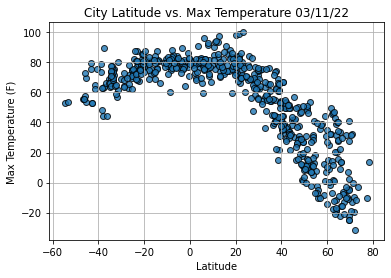

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

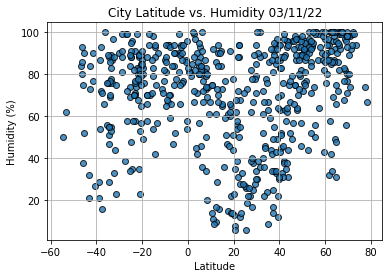

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

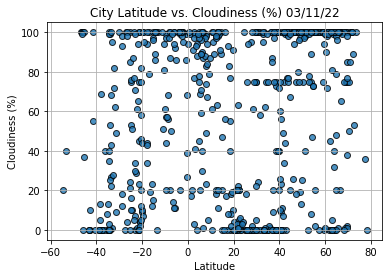

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

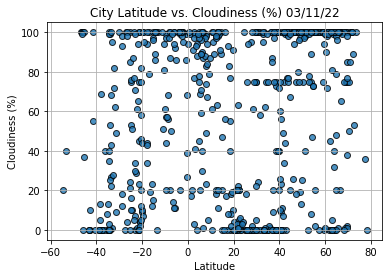

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

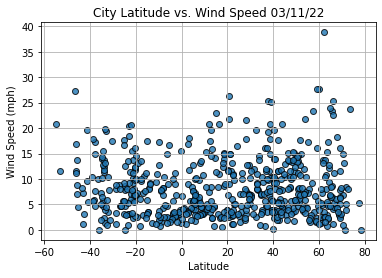

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()